# Proof of Accept Reject Sampling
See this paper [here](http://web.tecnico.ulisboa.pt/~mcasquilho/CD_Casquilho/MC_Flury_ar.pdf)

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
from statistics import NormalDist

import numpy as np
import matplotlib.pyplot as plt

In [3]:
dist = NormalDist()

In [4]:
step = 0.01
x = np.arange(-5, 5, step)
x = np.round(x, 2)
density = np.array([dist.pdf(_) for _ in x])

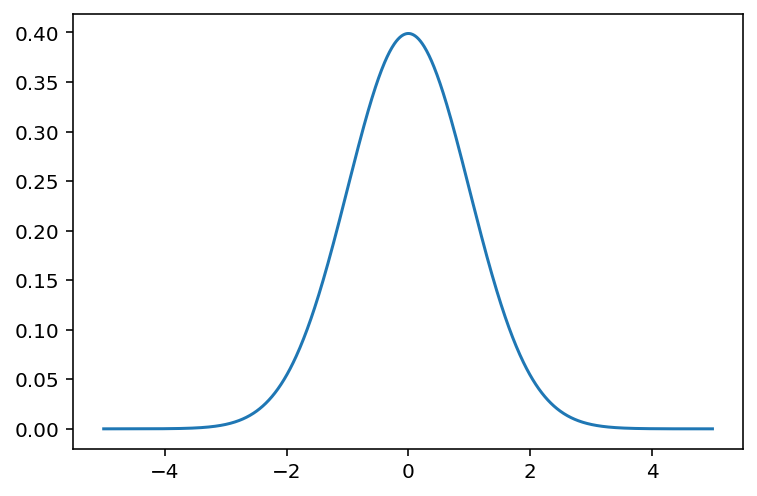

In [5]:
plt.plot(x, density)
plt.show()

In [6]:
y = [(0, d) for d in density] # These are our ranges of y values

In [7]:
def get_x_y_pair(x_val, x, y):
    x_idx = np.where(x == float(x_val))[0][0]
    y_idx = x_idx
    return (x[x_idx], y[y_idx])

In [8]:
get_x_y_pair(0, x, y)

(-0.0, (0, 0.3989422804014327))

What is the total size of all points in our set? 

In [9]:
total_size = 0
for x_val in x:
    pair = get_x_y_pair(x_val, x, y)
    total_size += pair[1][1]
total_size  

99.99994265729691

In [10]:
total_auc = 0
for x_val in x:
    pair = get_x_y_pair(x_val, x, y)
    total_auc += pair[1][1] * step
total_auc # This is what we would expect! The curve should have an area of 1 to be a valid probability

0.9999994265729668

What is the probability that x is 0? Well, we can approximate this by asking what the probability is that x is in the range [0, 0.01]. That is simple, just divide the size of that set by the total size:

In [11]:
pair = get_x_y_pair(0, x, y)
pair

(-0.0, (0, 0.3989422804014327))

In [12]:
x_zero_size = pair[1][1] * step
print('Probability that x is in the range [0, 0.01]: ', x_zero_size / total_size)

Probability that x is in the range [0, 0.01]:  3.989425091658512e-05


Is this reasonable? Well, if we do this for every point we should end up with a total probability of 1:

In [13]:
total_prob = 0
for x_val in x:
    pair = get_x_y_pair(x_val, x, y)
    x_pair_size = pair[1][1]
    prob = x_pair_size / total_size
    total_prob += prob
total_prob     

0.9999999999999987

What is this showing us? Well, by construction of $B$ (see the paper referenced), the probability density of observing of particular x is simply f(x)! 

Can we determine what the marginal of Y would be? Specifically, imagine slicing our density into thin vertical strips, then taking the y values of those strips and getting a distribution of the y values that occur overall:

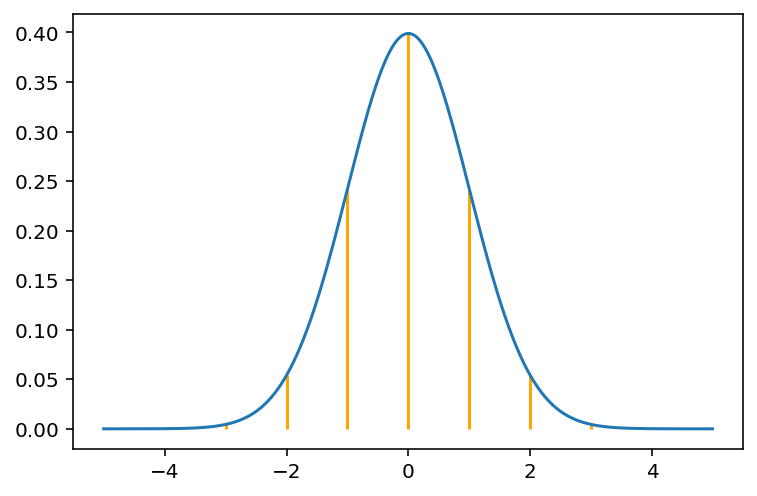

In [30]:
plt.plot(x, density)
for i in range(-5, 5, 1):
    plt.vlines(i, ymin=0, ymax=get_x_y_pair(i, x, density)[1], color='orange')
plt.show()

In [45]:
samp_step_size = 0.00001

ys = []
for x_val in x:
    
    # get density 
    d = get_x_y_pair(x_val, x, density)[1]
    y = np.arange(0, d, samp_step_size)
    ys.append(y)
    
    
#     print(x_val)

In [46]:
y_final = np.concatenate(ys)

In [47]:
len(y_final)

10000514

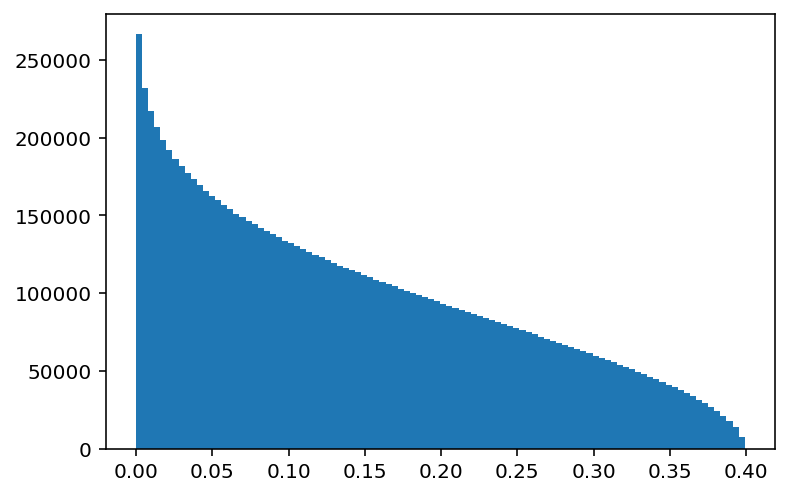

In [48]:
plt.hist(y_final, 100)
plt.show()

Leaving off: need to dig into this idea of reflection (see whiteboard) and the above rotation that we are observing. https://photos.google.com/photo/AF1QipOGn4saSym1UB2LWYwDMKwl_3VDDNGK1DnDIVxr

I don't think it is wald distribution. However, it is worth understanding how/why that transformation occurred.

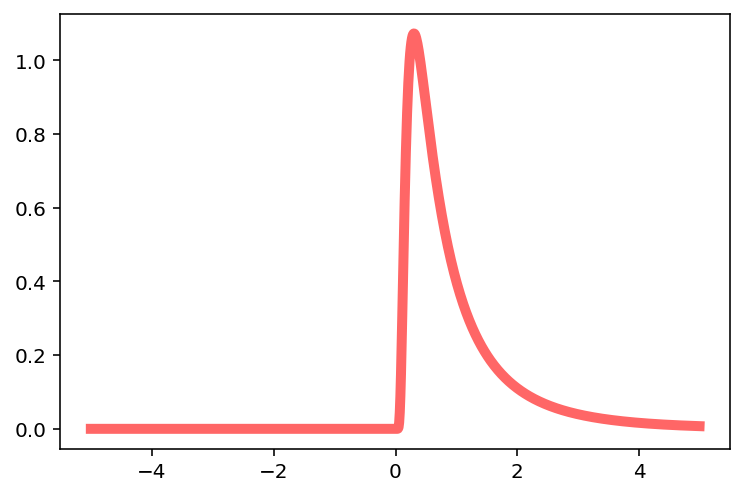

In [51]:
x_new = np.arange(0, )
plt.plot(, wald.pdf(x),
       'r-', lw=5, alpha=0.6, label='wald pdf')